# Google Play Store Apps

#### Abstract
This project aims to make Exploratory Data Analysis (EDA) and prediction models on the Google Play Store Apps dataset. These EDA and models will help the developers to understand the type of application people is preferred. I worked on a dataset founded through the Kaggle website. I used python libraries such as NumPy, pandas, and Matplotlib. 

#### Design 
The data has been collected by using Python script in June 2021. By Applying EDA the following questions will be answered:
-	Will the price affect number of installations?
-	What is the most downloaded app?
-	What is the most famous category of the app?

#### Data 
The dataset contains over 2 million instances with 22 features for each. Features include numerical and categorical types, such as rating, type, developer, etc. By using a linear regression model I will be able to predict the missing values. 

#### Algorithms 
•	Feature Engineering 
-	Handle missing values in 'rating' and 'minimum android' columns. 
-	Drop some non-useful columns such as currency.  
-	Converting categorical features to binary dummy variables.

•	Models 
-	Model to predict missing values.
-	Model to predict the rate of future App. 

#### Tools
-	Numpy 
-	Pandas 
-	Matplotlib 
-	Scikit-learn
-	Sklearn 


## 1- Import Packages

In [412]:
# munging imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# modeling imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## 2- Read the dataset

In [246]:
df = pd.read_csv('D:/desktop/DataScienceBootcamp/project/Google-Playstore.csv')

In [75]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


## 3- EDA

In [76]:
df.shape

(2312944, 24)

The dataset contains 2312944 instances and 24 features 

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

the features have diffrent types : object, float, int and bool.

In [78]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


By describe method we can have the statistics of each numeric feature. 

In [79]:
df.isna().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

By using isna().sum() we can know the null values for each column (feature).

In [150]:
df_dropna=df.dropna()
df_dropna.shape

(1287191, 24)

By using dropna() function we loss 1 milion row ... 

In [84]:
df['Category'].value_counts()

Education                  241090
Music & Audio              154906
Tools                      143988
Business                   143771
Entertainment              138276
Lifestyle                  118331
Books & Reference          116728
Personalization             89210
Health & Fitness            83510
Productivity                79698
Shopping                    75256
Food & Drink                73927
Travel & Local              67288
Finance                     65466
Arcade                      53792
Puzzle                      51168
Casual                      50813
Communication               48167
Sports                      47483
Social                      44734
News & Magazines            42807
Photography                 35552
Medical                     32065
Action                      27555
Maps & Navigation           26722
Simulation                  23282
Adventure                   23203
Educational                 21308
Art & Design                18539
Auto & Vehicle

By applying value_counts() function we can see the most common category which is "Education" followed by "Music & Audio" and "Comics" is the leaset common category.

In [85]:
df['Installs'].value_counts()

100+               443368
1,000+             398199
10+                300156
10,000+            256723
500+               189077
50+                170465
5,000+             143593
100,000+           110257
50,000+             75359
5+                  73772
1+                  65345
1,000,000+          33650
500,000+            27012
0+                  11566
5,000,000+           6595
10,000,000+          6192
50,000,000+           824
100,000,000+          549
500,000,000+           65
1,000,000,000+         55
5,000,000,000+         14
10,000,000,000+         1
Name: Installs, dtype: int64

By applying value_counts() on Installs feature we can notice that 443368 Apps have downloaded +100 times (100-500), while only one App have donloaded +10000000000 times

In [86]:
df['Developer Id'].value_counts()

Subsplash Inc           5422
TRAINERIZE              5153
ChowNow                 4865
OrderYOYO               2884
Phorest                 2821
                        ... 
Allied Press Limited       1
Dominik Węgrzyn            1
FNBT Clinton               1
Ben R Gleason              1
Prakash Jang               1
Name: Developer Id, Length: 758371, dtype: int64

By applying value_counts() function on "Developer Id" we can notice that "Subsplash Inc" has the highest number of puplished Apps by 5422 Apps on Google Store 

## Will the price affect number of installations?

In [154]:
df.groupby('Price')['Maximum Installs'].sum().sort_values()

##draw here 
##discover who is the most downloaded app when it is not free
##add static method to show and profe the diff between free and not free app (739123155435)
dfFree=df[df['Price']==0]    
print("total number of installs when it is free: ",dfFree['Maximum Installs'].sum()) 

dfFree=df[df['Price']!=0]    
print("total number of installs when it is not free: ", dfFree['Maximum Installs'].sum())

total number of installs when it is free:  739865893313
total number of installs when it is not free:  742737878


From this information we can say the number of installs when the app free is clearly higher than when it has price.

## What is the most downloaded app, why?

In [117]:
df.loc[df['Maximum Installs']==df['Maximum Installs'].max()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
2155096,Google Play services,com.google.android.gms,Tools,4.2,35128398.0,"10,000,000,000+",1.000000e+10,12057627016,True,0.0,...,https://developers.google.com/android/google-p...,apps-help@google.com,"May 24, 2012","Jun 10, 2021",Everyone,http://www.google.com/policies/privacy,False,False,False,2021-06-16 10:41:26


"Google Play services" is the most downloaded app. And that because it is used to update Google apps and apps from Google Play. 

## What is the most famous category of the app?

In [180]:
## I will used rating & maximum installs

df_draft=(df.groupby('Category')['Maximum Installs'].sum()).to_frame()
df_draft

df_draft.loc[df_draft['Maximum Installs']==sorted(df_draft['Maximum Installs'])[-1]]


,Maximum Installs
Category,
Tools,119849500546


In [181]:
df_draft.loc[df_draft['Maximum Installs']==sorted(df_draft['Maximum Installs'])[-2]]

,Maximum Installs
Category,
Communication,72306404399


The most fameous category is "Tools" and this is because it is the same type of the most downloaded App "Google Play services". While the second famouse category  is "Communication"

In [192]:
#I will remove it
df_draft=(df.groupby('Category')['Maximum Installs','Rating'].max())
df_draft

<ipython-input-192-26d2e6129fe6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_draft=(df.groupby('Category')['Maximum Installs','Rating'].max())


,Maximum Installs,Rating
Category,,
Action,976536041,5.0
Adventure,427633153,5.0
Arcade,1704495994,5.0
Art & Design,134619454,5.0
Auto & Vehicles,1976625745,5.0
Beauty,53849836,5.0
Board,589524427,5.0
Books & Reference,3202676731,5.0
Business,1410817280,5.0


## 4- Dataset

In [193]:
df.corr()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Ad Supported,In App Purchases,Editors Choice
Rating,1.000000,0.013038,0.011214,0.012615,-0.010756,-0.003674,0.160502,0.153820,0.019485
Rating Count,0.013038,1.000000,0.545281,0.547571,0.001410,-0.000411,0.005294,0.025737,0.137311
Minimum Installs,0.011214,0.545281,1.000000,0.954037,0.001623,-0.000461,0.002250,0.014179,0.059932
Maximum Installs,0.012615,0.547571,0.954037,1.000000,0.001815,-0.000515,0.002882,0.016101,0.064206
Free,-0.010756,0.001410,0.001623,0.001815,1.000000,-0.278831,0.123617,0.008669,-0.003157
Price,-0.003674,-0.000411,-0.000461,-0.000515,-0.278831,1.000000,-0.034276,-0.002634,0.000503
Ad Supported,0.160502,0.005294,0.002250,0.002882,0.123617,-0.034276,1.000000,0.138312,0.005702
In App Purchases,0.153820,0.025737,0.014179,0.016101,0.008669,-0.002634,0.138312,1.000000,0.046078
Editors Choice,0.019485,0.137311,0.059932,0.064206,-0.003157,0.000503,0.005702,0.046078,1.000000


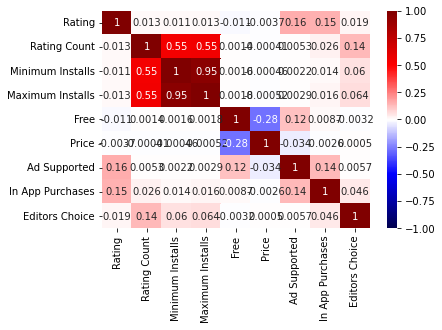

In [197]:
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [ ]:
##merge two cols
df['Free']=df

In [ ]:
# get dummies of content rating col & Ad Supported col & In App Purchasescol & Editors Choice col

#### create three diffrent dataset 

In [221]:
#Privacy Policy is website should I extract the developer name for it ?
df_draft=df.drop(['Currency','Minimum Android','Last Updated','Privacy Policy','Scraped Time','Developer Website'],1)
df_draft

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Developer Id,Developer Email,Released,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,10M,Jean Confident Irénée NIYIZIBYOSE,jean21101999@gmail.com,"Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,2.9M,Webserveis,webserveis@gmail.com,"May 21, 2020",Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,3.7M,Cabin Crew,vnacrewit@gmail.com,"Aug 9, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,1.8M,Climate Smart Tech2,climatesmarttech2@gmail.com,"Sep 10, 2018",Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,6.2M,Rafal Milek-Horodyski,rmilekhorodyski@gmail.com,"Feb 21, 2020",Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,77M,ALICE GAME,ssjjcomhk@gmail.com,NaN,Teen,False,False,False
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,44M,"3Dream Studios, LLC",3DreamDeveloper@gmail.com,"Jan 17, 2018",Everyone,False,False,False
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,29M,appoworld,appoworld.official@gmail.com,"Aug 19, 2018",Everyone,False,False,False
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,10M,Bhakti,ruchisono@gmail.com,"Aug 1, 2016",Everyone,True,False,False


In [222]:
df_draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 18 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          object 
 3   Rating            float64
 4   Rating Count      float64
 5   Installs          object 
 6   Minimum Installs  float64
 7   Maximum Installs  int64  
 8   Free              bool   
 9   Price             float64
 10  Size              object 
 11  Developer Id      object 
 12  Developer Email   object 
 13  Released          object 
 14  Content Rating    object 
 15  Ad Supported      bool   
 16  In App Purchases  bool   
 17  Editors Choice    bool   
dtypes: bool(4), float64(4), int64(1), object(9)
memory usage: 255.9+ MB


In [223]:
df_draft.isna().sum()

App Name                2
App Id                  0
Category                0
Rating              22883
Rating Count        22883
Installs              107
Minimum Installs      107
Maximum Installs        0
Free                    0
Price                   0
Size                  196
Developer Id           33
Developer Email        31
Released            71053
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

In [219]:
df['Price'].value_counts().head(10)

0.00    2268011
0.99      11851
1.99       5817
2.99       3921
1.49       3823
4.99       2496
3.99       2404
2.49       2182
3.49       1272
9.99        878
Name: Price, dtype: int64

In [262]:
## time series (Scraped Time & Released)
df['Rating Count'].value_counts()

0.0         1059762
5.0           64288
6.0           54325
7.0           46838
8.0           40585
             ...   
35179.0           1
11272.0           1
35178.0           1
35173.0           1
131071.0          1
Name: Rating Count, Length: 38482, dtype: int64

###### 1- Dataset 1:  by drop the na rows

In [237]:
df_dropna=df_draft.dropna()
df_dropna.shape

(2241625, 18)

###### 2- Dataset 2: by replacing the missing values

In [374]:
df_replaceMissing=df_draft
df_replaceMissing.isna().sum()

App Name                0
App Id                  0
Category                0
Rating                  0
Rating Count            0
Installs                0
Minimum Installs        0
Maximum Installs        0
Free                    0
Price                   0
Size                  196
Developer Id            0
Developer Email        31
Released            71053
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

In [375]:
Rating_median = df_replaceMissing.Rating.median()
df_replaceMissing.Rating.fillna(Rating_median, inplace=True)

In [376]:
#Is this true?
df_replaceMissing['Installs'].fillna(0, inplace=True)
df_replaceMissing['Minimum Installs'].fillna(0, inplace=True)


In [377]:
RatingCount_median = df_replaceMissing['Rating Count'].median()
df_replaceMissing['Rating Count'].fillna(RatingCount_median, inplace=True)

In [378]:
#could I use split ?
df_replaceMissing['App Name'].fillna(df_replaceMissing['App Id'],inplace=True)

In [379]:
# I used split with '.com' instead of '@' as I may have the developer ID in the domain
# I have chick if there is any NaN value in the 'developer email' col where the 'developer id' NaN but alhamdulilah it is not
df_replaceMissing['Developer Id'].fillna(((df_replaceMissing['Developer Email'].str.split('.com',1))[0])[0],inplace=True)



In [380]:
#Now I can drop 'deveoper Email' col
df_replaceMissing=df_replaceMissing.drop(['Developer Email'],1)


In [386]:
Size_mode = df_replaceMissing['Size'].mode()
df_replaceMissing['Size'].fillna(Size_mode[0], inplace=True)

In [396]:
int(((df_replaceMissing['Released'].str.split(',',1))[0])[1].strip())

2020

In [397]:
#Should I drop this col or keep it as it is or only keep the released year ?
df_replaceMissing['Released'].fillna(int(((df_replaceMissing['Released'].str.split(',',1))[0])[1].strip()),inplace=True)


In [398]:
df_replaceMissing.isna().sum()

App Name            0
App Id              0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Free                0
Price               0
Size                0
Developer Id        0
Released            0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

## 5- Models

In [409]:
def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)
 
def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

In [ ]:
logreg = LogisticRegression(penalty='none')

# Do the test 10 times with (unregularized) Logistic Regression and get the average score
quick_test_afew_times(logreg, df_replaceMissing.drop(['Installs','Released'],1), df_replaceMissing['Installs'])

In [423]:
# df_replaceMissing = df_replaceMissing.replace(to_replace = ['Everyone','Teen','Mature 17+','Everyone 10+','Unrated','Adults only 18+'],value = ['0','1','2','3','4','5'])
df_replaceMissing


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Developer Id,Released,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,10M,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020",0,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,2.9M,Webserveis,"May 21, 2020",0,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,3.7M,Cabin Crew,"Aug 9, 2019",0,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,1.8M,Climate Smart Tech2,"Sep 10, 2018",0,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,6.2M,Rafal Milek-Horodyski,"Feb 21, 2020",0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,77M,ALICE GAME,2020,1,False,False,False
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,44M,"3Dream Studios, LLC","Jan 17, 2018",0,False,False,False
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,29M,appoworld,"Aug 19, 2018",0,False,False,False
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,10M,Bhakti,"Aug 1, 2016",0,True,False,False


In [ ]:
decisiontree = DecisionTreeClassifier(max_depth=4)
quick_test_afew_times(decisiontree, df_replaceMissing.drop(['Installs'],1), df_replaceMissing['Installs'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_replaceMissing.drop(['Installs'],1), df_replaceMissing['Installs'], 
                                                    test_size = 0.2, random_state=42)
lm1 = LogisticRegression(C=1000) # setting C very high essentially removes regularization
lm1.fit(X_train, y_train)
lm1.score(X_train, y_train)

In [ ]:
import statsmodels.api as sm

y = df.Rating
x = df.drop(['Rating'], 1)

lsm = sm.OLS(y,x)

fit = lsm.fit()

fit.summary()

In [417]:
df_dropna['Content Rating'].value_counts()

0    1959699
1     190147
2      58671
3      32826
4        152
5        130
Name: Content Rating, dtype: int64

In [332]:
#to extract the missing values
df_replaceMissing[df_replaceMissing['Developer Id'].isna()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Developer Id,Developer Email,Released,Content Rating,Ad Supported,In App Purchases,Editors Choice
57686,All4jradio,com.primcast.all4jradio,Education,0.0,0.0,100+,100.0,137,True,0.0,62M,NaN,support@primcast.com,"Feb 22, 2019",Everyone,True,False,False
352371,Apsara Gold,com.paramount.apsaragold,Business,0.0,0.0,100+,100.0,268,True,0.0,10M,NaN,apsaragoldcovering@yahoo.co.in,"Apr 11, 2019",Everyone,False,False,False
583757,Tunai Kita Cair - Pinjam Uang Cepat Mudah Info,com.jlnperdan.ajt,News & Magazines,3.6,351.0,"50,000+",50000.0,93293,True,0.0,5.8M,NaN,taufiqfebriwanto19@gmail.com,"Jul 15, 2019",Everyone,True,False,False
611840,UNITY,com.unity.lgbt,Social,0.0,0.0,100+,100.0,217,True,0.0,2.5M,NaN,admin@unity.lgbt,"Mar 29, 2019",Teen,True,False,False
672480,Vimaket,com.sinon.vimaket,Shopping,0.0,0.0,500+,500.0,675,True,0.0,4.3M,NaN,Vimaket.gh@gmail.com,"Mar 22, 2019",Everyone,False,False,False
683575,Apsara Gold Admin,com.paramount.apsaragoldadmin,Business,0.0,0.0,100+,100.0,228,True,0.0,8.9M,NaN,apsaragoldcovering@yahoo.co.in,"Apr 11, 2019",Everyone,False,False,False
741546,Indian Fashion Trends,com.indianftrends.app,Shopping,0.0,0.0,"1,000+",1000.0,1740,True,0.0,3.1M,NaN,help.indianftrends@gmail.com,"Feb 11, 2019",Everyone,True,False,False
768634,WebEmprego,com.app.webemprego,Education,4.3,18.0,"1,000+",1000.0,2357,True,0.0,1.0M,NaN,contato@webemprego.net,"Feb 22, 2019",Everyone,True,False,False
877278,نیازه | Niyazeh,com.niyazeh,Business,0.0,0.0,100+,100.0,428,True,0.0,5.8M,NaN,info@mail.niyazeh.com,"Mar 9, 2019",Everyone,False,False,False
959343,Aamari Grocers,com.aamari.android,Shopping,0.0,0.0,100+,100.0,302,True,0.0,17M,NaN,aamarigrocersonline@gmail.com,"Feb 8, 2019",Everyone,False,False,False


In [363]:
# I should make a search about this function
df['Size'].interpolate(method='polynomial')

ValueError: You must specify the order of the spline or polynomial.